# PYEPHEM tutorijal

In [2]:
import ephem

## Nebeska tela

In [3]:
M = ephem.Mars()
S = ephem.Sun()
A = ephem.star("Arcturus")

### Određivanje karakteristika nebeskog tela u određenom trenutku

- Pyephem sadrži funkciju compute() koja vrednosti nebeskog tela nad kojim je pozvana postavlja na one koje odgovaraju telu za trenutak u vremenu koji je prosleđen kao argument

- Ukoliko ne prosledimo datum funkciji *compute* dobićemo trenutne podatke

In [4]:
M.compute("2002/10/20")
print("%s 2002. godine\
    \nelongacija: %s \nveličina: %.11f\n" % (M.name, M.elong, M.size))

M.compute("2012/10/20")
print("%s 2012. godine\
    \nelongacija: %s \nveličina: %.11f\n" % (M.name, M.elong, M.size))

M.compute()
print("%s sada:\
      \nelongacija: %s \nveličina: %.11f\n" % (M.name, M.elong, M.size))


Mars 2002. godine    
elongacija: -23:43:37.4 
veličina: 3.70745754242

Mars 2012. godine    
elongacija: 42:12:12.7 
veličina: 4.64552783966

Mars sada:      
elongacija: -128:05:13.4 
veličina: 14.56486225128



- Neki korisni atributi nebeskih tela:

In [5]:
print(f"Rektascenzija: {M.ra}")
print(f"Deklinacija: {M.dec}")
print(f"Magnituda: {M.mag}")
print(f"Ugaoni poluprečnik: {M.radius}")

Rektascenzija: 5:40:27.79
Deklinacija: 23:38:59.7
Magnituda: -1.11
Ugaoni poluprečnik: 0:00:07.3


### Nebesko telo u odnosu na posmatrača

- Pyephem nam daje opciju da funkciji *compute* prosledimo posmatrača i tako dobijemo i podatke o zvezdi specifične za njegov položaj

In [6]:
bg = ephem.Observer()
bg.lon = "44.787197"
bg.lat = "20.457273"
bg.elevation = 117

S = ephem.Sun(bg)
print(f"Trenutno iz Beograda vidimo Sunce na horizontskim koordinatama:")
print(f"Azimut: {S.az}")
print(f"Visina: {S.alt}")

Trenutno iz Beograda vidimo Sunce na horizontskim koordinatama:
Azimut: 95:29:49.8
Visina: -23:11:42.0


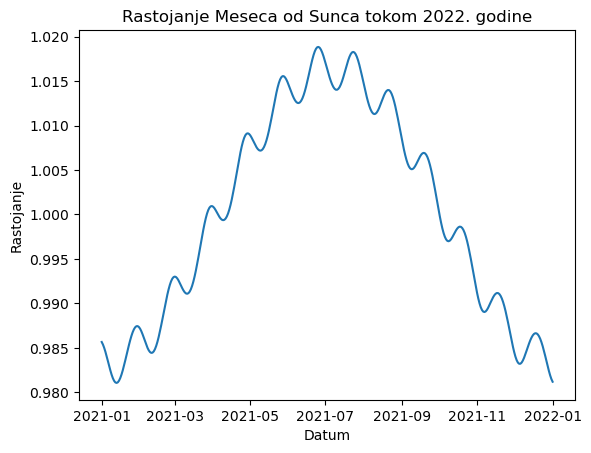

In [7]:
import numpy
import pandas as pd
from matplotlib import pyplot as plt

t = pd.date_range(start='2021-01-01',
                  end='2022-01-01',
                  periods=365)

moon = ephem.Moon()
distances = []

for date in t:
    moon.compute(date)
    distances.append(moon.sun_distance)
    
    
plt.plot(t, distances)
plt.title("Rastojanje Meseca od Sunca tokom 2022. godine")
plt.ylabel("Rastojanje")
plt.xlabel("Datum")


plt.show()
    

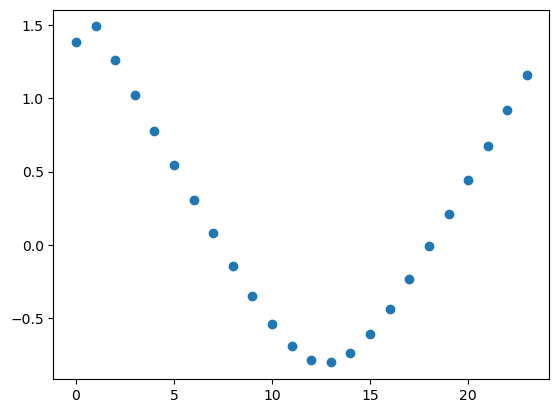

In [8]:
import numpy
import pandas as pd
from matplotlib import pyplot as plt

t = pd.date_range(start='2022-10-20',
                  end='2022-10-21',
                  periods=24)

mars = ephem.Mars()
sati = numpy.arange(0,24,1)
alts = []

for i in sati:
    bg.date = f"2022/10/20 {i}:00"
    mars.compute(bg)
    alts.append(mars.alt)


plt.scatter(sati, alts)
plt.show()
    

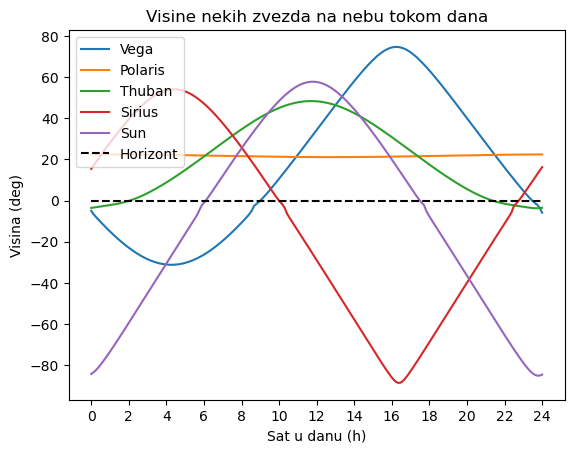

In [12]:
beograd = ephem.Observer()
beograd.lon, beograd.lat = "44", "21"


x = numpy.linspace(0,24,192)
timestamps = pd.date_range(start="2022/10/27 21:00",
                           end="2022/10/28 21:00",
                           periods=192)

def plotStar(star):
    alts = []
    for i in timestamps:
        beograd.date = i
        star.compute(beograd)
        alts.append(star.alt*59.3) # rad -> deg
    
    plt.plot(x, alts, label=star.name)
    

plotStar(ephem.star("Vega"))
plotStar(ephem.star("Polaris"))
plotStar(ephem.star("Thuban"))
plotStar(ephem.star("Sirius"))
plotStar(ephem.Sun())

plt.plot(x, x*0, "k--", label="Horizont")
plt.xlabel("Sat u danu (h)")
plt.ylabel("Visina (deg)")
plt.xticks(numpy.linspace(0,24,13))
plt.legend(loc=2)
plt.title("Visine nekih zvezda na nebu tokom dana")
plt.show()